# Lens modeling of DESIJ1018-0121 with `lenstronomy`
**Authors:** MD. Jobair Hasan, Anowar Shajib

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Import the required packages

In [2]:
# make sure lenstronomy is installed, otherwise install the latest pip version
try:
  import lenstronomy
except:
  !pip install lenstronomy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.4 MB/s eta 0:00:00
  Created wheel for lenstronomy: filename=lenstronomy-1.11.1-py3-none-any.whl size=1020225 sha256=7eff75cfa2fe16d8516ad9afbd20753e4433a6ff0e51a7d751f5b8c577d84d82
  Stored in directory: /root/.cache/pip/wheels/91/19/a9/bdda99ea594095380436b1bd9a6ea933db13ff01c26f1265d8
  Created wheel for schwimmbad: filename=schwimmbad-0.3.2-py3-none-any.whl size=15742 sha256=1760cbe40b496e6e7963de1ee39ab18cbfa93f584

In [1]:
#import the necessary python libraries

import h5py
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline


## Read the data file


In [2]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Data/masking/DESIJ1018-0121_F140W.h5', 'r') as f:
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]
        
kwargs_data


{'background_rms': 0.018610074701766573,
 'dec_at_xy_0': -5.799999999999994,
 'exposure_time': array([[486.32956, 387.50772, 555.4221 , ..., 561.57306, 436.89725,
         453.8047 ],
        [525.3609 , 455.32626, 433.4547 , ..., 467.7759 , 393.7413 ,
         575.8005 ],
        [406.4474 , 553.6718 , 442.7201 , ..., 439.1787 , 455.65027,
         465.92584],
        ...,
        [424.9911 , 470.85703, 480.29526, ..., 431.6869 , 500.74237,
         476.34906],
        [416.17792, 491.75076, 384.38663, ..., 364.7395 , 248.40552,
         394.68134],
        [461.31955, 487.39075, 457.4765 , ..., 516.8107 , 438.08667,
         375.04907]], dtype=float32),
 'image_data': array([[ 0.01961958, -0.00048153, -0.01787547, ..., -0.01659699,
         -0.00921571,  0.01057982],
        [ 0.02892776,  0.01651465, -0.00482212, ..., -0.00829422,
         -0.00578246,  0.0005834 ],
        [ 0.01247546,  0.00889849,  0.00884483, ...,  0.01536562,
          0.0021972 , -0.01391137],
        ...,
   

## Load the PSF data

In [3]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Data/masking/psf_F140W.h5', 'r') as f:
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()]
        
kwargs_psf['psf_type'] = 'PIXEL'

kwargs_psf


{'kernel_point_source': array([[5.7422681e-06, 4.5087054e-06, 2.4900439e-06, ..., 1.8486933e-06,
         3.2385867e-06, 4.4331632e-06],
        [3.9503216e-06, 9.9817180e-06, 6.5966469e-06, ..., 3.9997908e-06,
         6.6143798e-06, 4.1430776e-06],
        [2.9697005e-06, 5.5563592e-06, 1.2795975e-05, ..., 7.8115263e-06,
         5.1404800e-06, 1.7530243e-06],
        ...,
        [1.6921831e-06, 3.7347368e-06, 7.6415899e-06, ..., 1.1465157e-05,
         5.3933368e-06, 1.6360833e-06],
        [2.8819463e-06, 6.2348781e-06, 4.7564718e-06, ..., 4.5906190e-06,
         8.7221979e-06, 3.7005334e-06],
        [3.7170516e-06, 3.6243027e-06, 1.6518559e-06, ..., 2.0127884e-06,
         3.2246478e-06, 5.1252514e-06]], dtype=float32),
 'psf_type': 'PIXEL'}

## Get the image data from `kwargs_data` and plot it

<ipython-input-4-616a7a015bab>:4: RuntimeWarning: invalid value encountered in log10
  ax1.matshow(np.log10(image_data), origin='lower', cmap='cubehelix')
<ipython-input-4-616a7a015bab>:5: RuntimeWarning: invalid value encountered in log10
  ax2.matshow(np.log10(image_data), origin='lower', cmap='cubehelix')


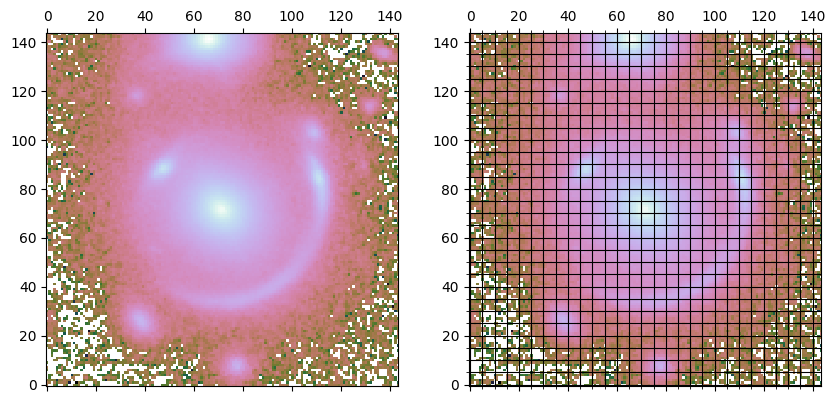

In [4]:
image_data = kwargs_data['image_data']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.matshow(np.log10(image_data), origin='lower', cmap='cubehelix')
ax2.matshow(np.log10(image_data), origin='lower', cmap='cubehelix')
ax2.grid(which='both', color='black')
ax2.minorticks_on()
ax2.grid(which='minor', color='black')
plt.show()


## Make Likelihood mask and plot it

<ipython-input-5-e97298760a56>:28: RuntimeWarning: invalid value encountered in log10
  image = np.log10(image_data)


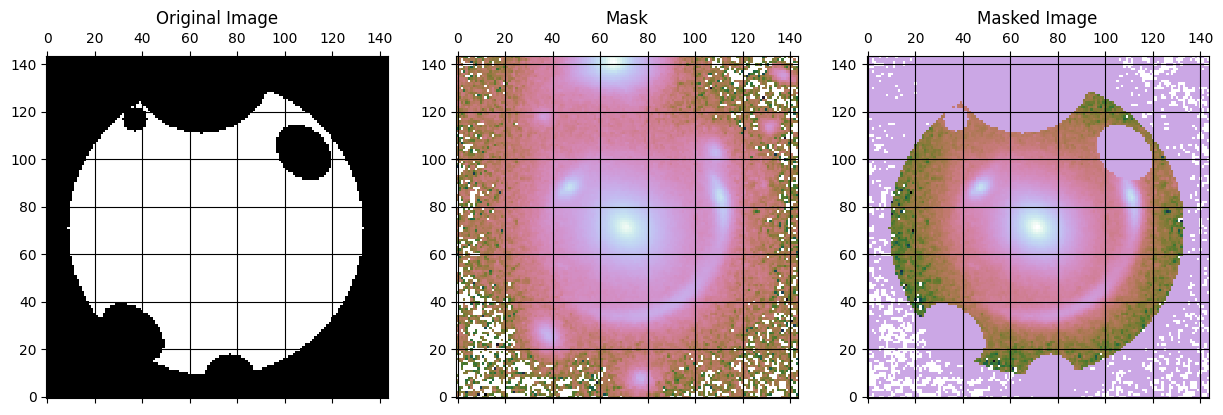

In [5]:
import lenstronomy.Util.mask_util as mk
import lenstronomy.Util.util as ut


x_c, y_c = np.meshgrid(np.arange(144), np.arange(144))
mask = 1 - mk.mask_center_2d(71, 71, 62, x_c, y_c)

mask_params = [[65, 140, 30, 29, 0],
               #[55, 45, 2, 2, 0],
               [108, 103, 13, 10, np.pi*135/180],
               [77, 7, 11, 11, 0],
               [36, 27, 15, 10, np.pi*140/180],
               [37,117, 5, 5, 0],
               #[47, 88, 10, 5, np.pi*45/180]
               ]

for mask_param in mask_params:
  mask *= 1 - mk.mask_ellipse(x_c, y_c,
                              mask_param[0],
                              mask_param[1],
                              mask_param[2],
                              mask_param[3],
                              mask_param[4]
                              )

mask[mask >= 1] = 1
mask[mask < 0] = 0

image = np.log10(image_data)
masked_image = np.multiply(image, mask)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.matshow(mask, origin='lower', cmap='gray')
ax1.grid(which='both', color='black')
ax1.grid(which='minor', color='black')
ax1.title.set_text('Original Image')
ax2.matshow(image, origin='lower', cmap='cubehelix')
ax2.grid(which='both', color='black')
ax2.grid(which='minor', color='black')
ax2.title.set_text('Mask')
ax3.matshow(masked_image, origin='lower', cmap='cubehelix')
ax3.grid(which='both', color='black')
ax3.grid(which='minor', color='black')
ax3.title.set_text('Masked Image')

## Fit Initial Lensing Model Fitting with the Created Mask using `Lenstronomy`

In [7]:
lens_model_list = ['EPL', 'SHEAR']
source_model_list = ['SERSIC_ELLIPSE', 'SHAPELETS']
lens_light_model_list = ['SERSIC_ELLIPSE']

In [9]:
# lens galaxy's mass model
fixed_lens = []
kwargs_lens_init = [{'theta_E': 2.872367764522405, 'gamma': 1.9956289446141318, 
                     'e1': 0.01024869129729854, 'e2': 0.10832008253117237, 
                     'center_x': 0.10237921308610401, 
                     'center_y': -0.07543214381473348}, 
                    {'gamma1': 0.013297495518419281, 
                     'gamma2': -0.025626801140510563, 
                     'ra_0': 0.0, 'dec_0': 0.0}]
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []

fixed_lens.append({})

fixed_lens.append({'ra_0': 0., 'dec_0': 0.})

kwargs_lens_sigma.append({'theta_E': .2, 'gamma': .1, 'e1': 0.05, 'e2': 0.05,
                         'center_x': 0.5, 'center_y': 0.5})
kwargs_lens_sigma.append({'gamma1': 0.05, 'gamma2': 0.05})

kwargs_lower_lens.append({'theta_E': 0.01, 'gamma': 1., 'e1': -0.5,
                          'e2': -0.5, 'center_x': -10, 'center_y': -10})
kwargs_lower_lens.append({'gamma1': -0.3, 'gamma2': -0.3})

kwargs_upper_lens.append({'theta_E': 10., 'gamma': 3., 'e1': 0.5, 'e2': 0.5,
                          'center_x': 10, 'center_y': 10})
kwargs_upper_lens.append({'gamma1': 0.3, 'gamma2': 0.3})


lens_params = [kwargs_lens_init, kwargs_lens_sigma, fixed_lens, 
               kwargs_lower_lens, kwargs_upper_lens]



# lens galaxy's light model
fixed_lens_light = []
kwargs_lens_light_init = [{'amp': 1, 'R_sersic': 1.2514163377698204, 
                           'n_sersic': 4.0, 'e1': 0.01024869129729854, 
                           'e2': 0.10832008253117237, 
                           'center_x': 0.10237921308610401, 
                           'center_y': -0.07543214381473348}]
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({'n_sersic': 4.})

kwargs_lens_light_sigma.append({'n_sersic': 1, 'R_sersic': 0.3, 'e1': 0.05, 
                                'e2': 0.05, 'center_x': 0.1, 'center_y': 0.1, 
                                'amp': 10})
kwargs_lower_lens_light.append({'e1': -0.5, 'e2': -0.5, 'R_sersic': 0.001, 
                                'n_sersic': .5, 'center_x': -10, 
                                'center_y': -10, 'amp': 0})
kwargs_upper_lens_light.append({'e1': 0.5, 'e2': 0.5, 'R_sersic': 10, 
                                'n_sersic': 5., 'center_x': 10, 
                                'center_y': 10, 'amp': 100})

joint_lens_with_light = [[0, 0, ['center_x', 'center_y', 'e1', 'e2']]]

lens_light_params = [kwargs_lens_light_init, kwargs_lens_light_sigma, 
                     fixed_lens_light, kwargs_lower_lens_light, 
                     kwargs_upper_lens_light]


# source galaxy's light model
fixed_source = []
kwargs_source_init = [{'amp': 1, 'R_sersic': 0.2846117152855781, 
                       'n_sersic': 1.0, 'e1': -0.013101882041564468, 
                       'e2': -0.1583430672954567, 
                       'center_x': -0.2987388873436853, 
                       'center_y': -0.20087672138225174}, 
                      {'amp': 1, 'n_max': 5, 'beta': 0.05982949721405195, 
                       'center_x': -0.2987388873436853, 
                       'center_y': -0.20087672138225174}]
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []

fixed_source.append({'n_sersic': 1.})

fixed_source.append({'n_max': 5})

kwargs_source_sigma.append({'n_sersic': 0.5, 'R_sersic': 0.1, 'e1': 0.05, 
                            'e2': 0.05, 'center_x': 0.2, 'center_y': 0.2,
                            'amp': 10})
kwargs_source_sigma.append({'beta': 0.1, 'center_x': 0.1, 'center_y': 0.1})

kwargs_lower_source.append({'e1': -0.5, 'e2': -0.5, 'R_sersic': 0.001, 
                            'n_sersic': .5, 'center_x': -10, 'center_y': -10,
                            'amp': 0})
kwargs_lower_source.append({'beta':0.01, 'center_x': -10, 'center_y': -10})

kwargs_upper_source.append({'e1': 0.5, 'e2': 0.5, 'R_sersic': 10, 
                            'n_sersic': 5., 'center_x': 10, 'center_y': 10,
                            'amp': 100})
kwargs_upper_source.append({'beta':5, 'center_x': 10, 'center_y': 10})

joint_source_with_source = [[0, 1, ['center_x', 'center_y']]]

source_params = [kwargs_source_init, kwargs_source_sigma, fixed_source, 
                 kwargs_lower_source, kwargs_upper_source]


# combining all the above specification in the `kwargs_params` dictionary
kwargs_params = {'lens_model': lens_params,
                 'source_model': source_params,
                 'lens_light_model': lens_light_params}

kwargs_constraints = {'joint_lens_with_light': joint_lens_with_light, 
                      'joint_source_with_source': joint_source_with_source}


In [10]:
kwargs_likelihood = {'check_bounds': True,
                     'image_likelihood_mask_list': [mask]
                     }

kwargs_numerics = {'supersampling_factor': 1,
                   'supersampling_convolution': False
                   }


In [11]:
kwargs_model = {'lens_model_list': lens_model_list,
                'source_light_model_list': source_model_list,
                'lens_light_model_list': lens_light_model_list}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {'multi_band_list': multi_band_list,
                     'multi_band_type': 'single-band'
                     # 'multi-linear': every imaging band has independent 
                     # solutions of the surface brightness, 
                     # 'joint-linear': there is one joint solution of the linear
                     # coefficients demanded across the bands.
                    }


In [12]:
from lenstronomy.Workflow.fitting_sequence import FittingSequence


fitting_seq = FittingSequence(kwargs_data_joint, kwargs_model, 
                              kwargs_constraints, kwargs_likelihood, 
                              kwargs_params)

fitting_kwargs_list = [['PSO', {'sigma_scale': 1., 'n_particles': 200,
                                'n_iterations': 200}],
                       #['MCMC', {'n_burn': 200, 'n_run': 600, 'n_walkers':
                       # 200, 'sigma_scale': .1}]
        ]

chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit()


Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
Max iteration reached! Stopping.
-1.6665065058061752 reduced X^2 of best position
-8501.682939370203 log likelihood
10203 effective number of data points
[{'theta_E': 2.882663047265222, 'gamma': 1.755459458793338, 'e1': 0.011828164205246362, 'e2': 0.10523379367259697, 'center_x': 0.10168074502205487, 'center_y': -0.07450193023929712}, {'gamma1': 0.014855870977657863, 'gamma2': 0.00599105774682653, 'ra_0': 0.0, 'dec_0': 0.0}] lens result
[{'amp': 1, 'R_sersic': 0.17793406532207948, 'n_sersic': 1.0, 'e1': 0.026616890973262676, 'e2': -0.12091178359455527, 'center_x': -0.19816268283963195, 'center_y': -0.1780359726734026}, {'amp': 1, 'n_max': 5, 'beta': 0.04122889204061717, 'center_x': -0.19816268283963195, 'center_y': -0.1780359726734026}] source result
[{'amp': 1, 'R_sersic': 1.258391792139358, 'n_sersic': 4.0, 'e1': 0.011828164205246362, 'e2': 0.10523379367259697, 'center_x': 0.10168074502205487

-1.6603227906614946 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.6603227906614948


<ipython-input-14-9403c24ac903>:19: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


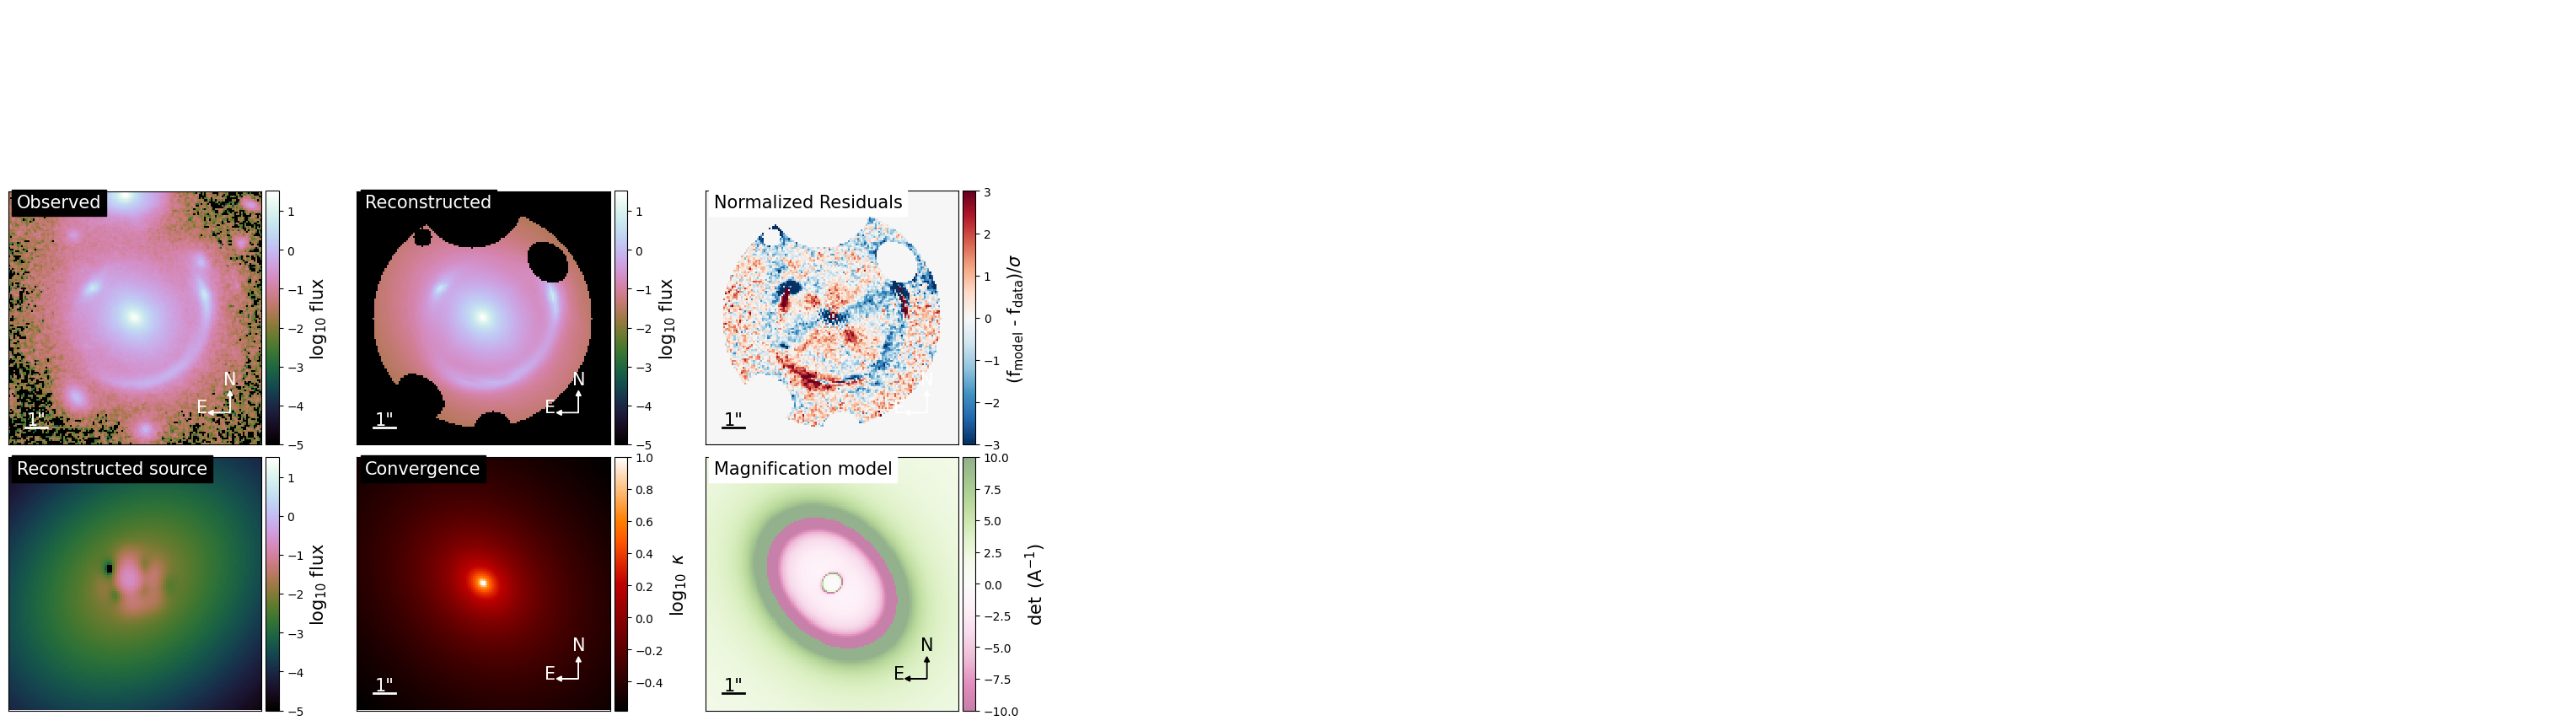

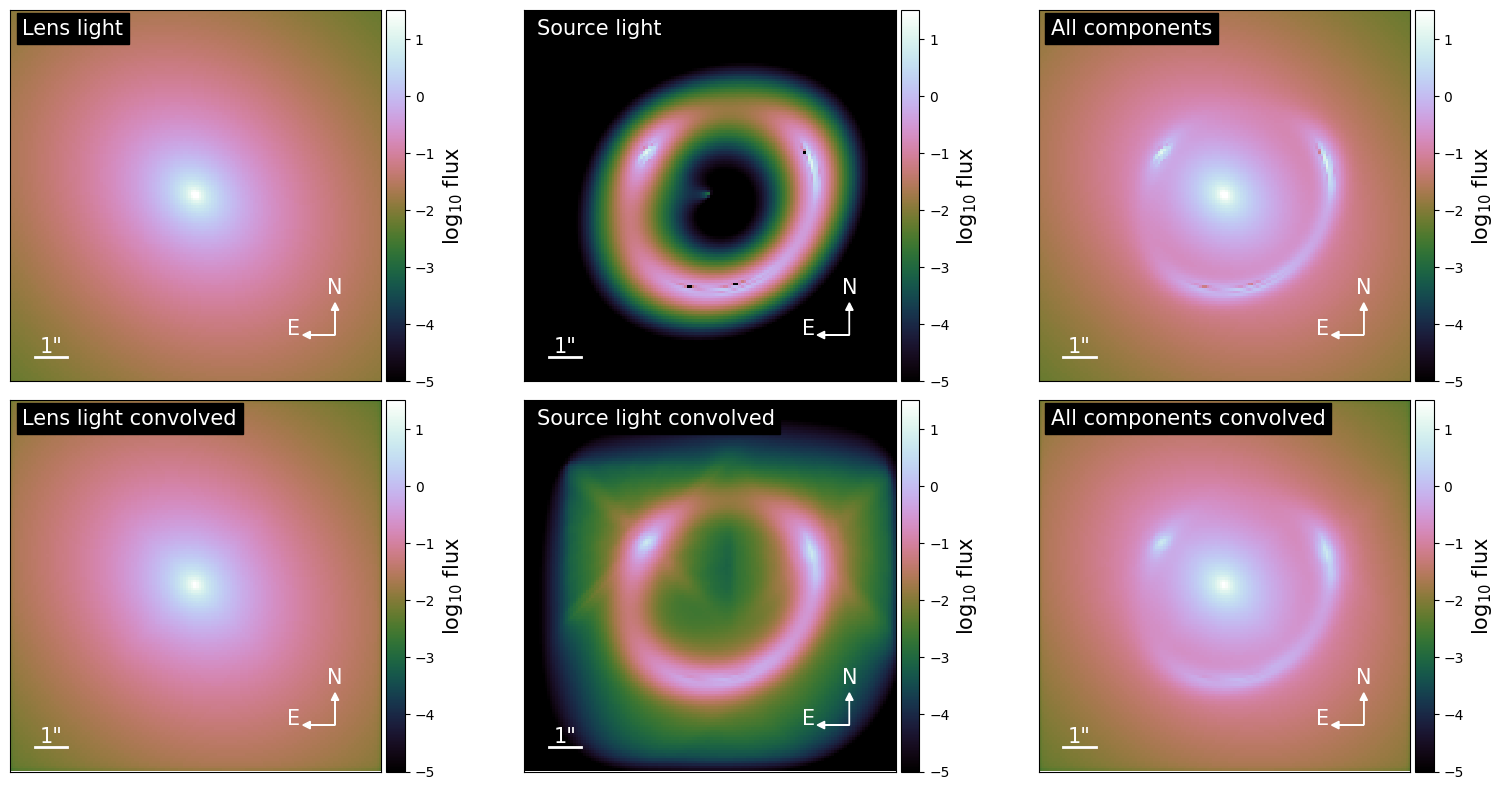

{'kwargs_lens': [{'theta_E': 2.882663047265222, 'gamma': 1.755459458793338, 'e1': 0.011828164205246362, 'e2': 0.10523379367259697, 'center_x': 0.10168074502205487, 'center_y': -0.07450193023929712}, {'gamma1': 0.014855870977657863, 'gamma2': 0.00599105774682653, 'ra_0': 0.0, 'dec_0': 0.0}], 'kwargs_source': [{'amp': 1, 'R_sersic': 0.17793406532207948, 'n_sersic': 1.0, 'e1': 0.026616890973262676, 'e2': -0.12091178359455527, 'center_x': -0.19816268283963195, 'center_y': -0.1780359726734026}, {'amp': 1, 'n_max': 5, 'beta': 0.04122889204061717, 'center_x': -0.19816268283963195, 'center_y': -0.1780359726734026}], 'kwargs_lens_light': [{'amp': 1, 'R_sersic': 1.258391792139358, 'n_sersic': 4.0, 'e1': 0.011828164205246362, 'e2': 0.10523379367259697, 'center_x': 0.10168074502205487, 'center_y': -0.07450193023929712}], 'kwargs_ps': [], 'kwargs_special': {}, 'kwargs_extinction': []}


In [14]:
from lenstronomy.Plots.model_plot import ModelPlot


model_plot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, 
                      arrow_size=0.02,
                      cmap_string="cubehelix",
                      image_likelihood_mask_list=kwargs_likelihood['image_likelihood_mask_list']
                      )

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.data_plot(ax=axes[0,0])
model_plot.model_plot(ax=axes[0,1])
model_plot.normalized_residual_plot(ax=axes[0,2], v_min=-3, v_max=3,
                                   cmap='RdBu_r')
model_plot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100)
model_plot.convergence_plot(ax=axes[1, 1], v_max=1, cmap='gist_heat')
model_plot.magnification_plot(ax=axes[1, 2], cmap='PiYG')
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., 
                  hspace=0.05)
plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.decomposition_plot(ax=axes[0,0], text='Lens light', 
                             lens_light_add=True, unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', 
                             lens_light_add=True)
model_plot.decomposition_plot(ax=axes[0,1], text='Source light', 
                             source_add=True, unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,1], text='Source light convolved', 
                             source_add=True)
model_plot.decomposition_plot(ax=axes[0,2], text='All components', 
                             source_add=True, lens_light_add=True, 
                              unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,2], text='All components convolved', 
                             source_add=True, lens_light_add=True, 
                              point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., 
                  hspace=0.05)
plt.show()
print(kwargs_result)